Das Thema dieses Blogbeitrags ist Lineare Regression -  ein sehr verbreitetes und praktisch nutzbares Modell für statistische Analyse. Lineare Regression wird verwendet, um die Beziehung zwischen zwei oder mehreren Variablen zu untersuchen. Ein Beispiel für die Anwendung linearer Regression ist, das Verhältnis zwischen Zinsen für Sparkonten und Spareinlagen beim Banking in Erfahrung zu bringen. Ein weiteres Beispiel wäre der Einfluss von Cholesterol auf Herzkrankheiten.

Im Blogbeitrag werden zuerst kurz die formalen Grundlagen des Algorithmus erklärt, danach kommt eine praktische Erklärung und effektive Implementierung des linearen Modells sowohl für Regression als auch für Klassifizierung.

# Lineare Regression mit Python

Die lineare Regression ist ein statistisches Modell, das eine lineare Beziehung zwischen zwei oder mehreren Variablen untersucht. Eine davon ist die abhängige Variable (auch erklärte genannt), die wir vorhersagen oder klassifizieren möchten. Wir haben auch mindestens eine unabhängige Variable (auch erklärende genannt). Eine lineare Beziehung bedeutet formal, dass wir eine Funktion haben die folgendermaßen aussieht:

`yi = β0 + β1 * xi1 + β2 * xi2 + ... + βn * xin + εi`

`X` ist die Menge aller Stichproben des Datensatzes, `xi` ist ein Tupel aller Merkmale einer Stichprobe und `xi,j` ist das j-te Merkmal der i-ten Stichprobe.

`y` ist die Menge aller abhängigen Variablen, die wir für das Training benutzen und auch vorhersagen oder klassifizieren möchten. `yi` sind konkrete Exemplare abhängiger Variablen.

`β` ist die Menge der Gewichte, mit denen man die unabhängigen Variablen multipliziert, um `y` zu bekommen. Wenn wir das Modell anpassen, finden wir ein `β`, dass die oben aufgeführte Gleichung auf alle Stichproben zutrifft.

`εi` ist der Fehler - eine Variable, die alle Faktoren umfasst, die `yi` beeinflussen (außer die unabhängigen Variablen `xi` ).

Da alle diese Variablen Vektoren oder Matrizen sind, kann man die Formel folgendermaßen zusammenfassen:

`y = βX + ε`


Da wir mithilfe des linearen Modells die Fehler nicht berechnen können, sieht die Vorhersage oder Klassifizierung folgendermaßen aus:

`ŷ = βX`

Nicht formal bedeutet das, dass wenn der Wert einer der unabhängigen Variablen wächst, so wächst auch die abhängige Variable (oder sinkt - in diesem Fall sprechen wir von einer negativen linearen Beziehung). Unsere Aufgabe, wenn wir die Daten plotten, ist, eine solche Linie zu ziehen, damit der mittlere quadratische Abstand von jedem Punkt zur Linie minimal ist. Das gilt natürlich für 2-dimensionale Daten. Für 3-Dimensionale Daten ist die Funktion keine Linie, sondern eine Ebene.

![figure_REGR_LINE](figures/figure_REGR_LINE.png)

Zusätzlich kann man ein lineares Modell auch für binäre Klassifizierung verwenden. Klassen werden typischerweise durch die Zahlen 0 und 1 dargestellt. Aufgrund der Natur des Algorithmus bekommt man als Ergebnis des Modells Zahlen zwischen 0 und 1. Dann werden alle Zahlen größer als 0,5 auf 1 gesetzt und der Rest auf 0.

## Lineare Regression in Python

`Scikit-learn` ist ein mächtiges Machine Learning Framework. Das Modul `sklearn.linear_model` enthält viele Methoden die nützlich sind, wenn man eine abhängige Variable hat, die in linearem Verhältnis von den unabhängigen Variablen ist.
Außerdem werden wir `numpy` and `pandas` verwenden, die die Arbeit mit Daten sehr erleichtern, und `matplotlib` um Daten darzustellen.

### Datensatz

Für die Regressionsaufgabe werden wir einen Datensatz von Immobilenpreisen im Gebiet Boston verwenden. Die Daten stammen ursprünglich von der Carnegie Mellon University und sind hier zu finden: [Link](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) 

Zusätzlich sind die Daten in `sklearn.datasets` vorhanden.

Man kann entweder den Link öffnen oder `data.DESCR` aufrufen um eine Beschreibung des Datensatzes zu bekommen, die aber auf englisch ist. 

Im Datensatz sind zwei Afgaben zu finden:
- Den PREIS der Häuser berechnen (*Die Aufgabe, die wir in diesem Blogbeitrag lösen*)
- Stickstoffmonoxidniveaus (NOX) vorhersagen 

### Implementierung

Zuerst importieren wir alle nötigen Bilbiotheken.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split

Wie gesagt, können wir dieses Mal den Datensatz von `sklearn` importieren. Dennoch speichern wir ihn in ein Pandas DataFrame, damit es einfacher ist, auf verschiedene Attribute zuzugreifen. Die Rückgabe von `load_boston()` ist ein Wörterbuch mit 4 Attributen: 
- `data.data` - ein numpy-Array, das die 13 Attribute und deren Werte enthält, also eigentlich die X Menge.
- `data.target` - die y Menge, also ein 1-dimensionales Array, das die Preise der Immobilien enthält
- `data.feature_names` - eine Liste mit den Namen der 13 Attribute
- `data.DESCR` - eine Zeichenkette der Beschreibung der Daten. Alle Attribute sind dort erklärt.

In [96]:
# Datensatz laden
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names

target = pd.DataFrame(data.target)
target.columns = ["PRICE"]

Jetzt wollen wir die Daten für die Regression vorbereiten und sie dann analysieren. Zuerst wollen wir sie in Test- und Trainingsdaten splitten. Dafür verwenden wir die Funktion `train_test_split()` von `sklearn.model_selection`, die ein 4-tupel von Arrays zurückgibt. Deswegen kann man es einfach folgendermaßen machen:

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
                                    df, 
                                    target, 
                                    test_size=0.25, 
                                    random_state=32)

Dies verwendet 1/4 der Daten als Trainingsdaten, und weil wir ein `random_state` spezifiziert haben, werden bei jeder Ausführung dieselben Daten als Testdaten gewählt.

Wir verwenden die Trainigsdaten, um das Modell anzupassen. So werden auch die Koeffiziente der Regression berechnet. Das sind die Zahlen, mit denen die unabhängigen Variablen multipliziert werden, um die abhängige Variable zu berechnen.

In [98]:
# Anpassen des linearen Modells
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Koeffiziente der Regression
coef = pd.DataFrame({'features': df.columns, 'coef': regr.coef_[0]})
print(coef)

         coef features
0   -0.111906     CRIM
1    0.043386       ZN
2    0.017872    INDUS
3    1.355113     CHAS
4  -17.775653      NOX
5    3.651566       RM
6    0.000306      AGE
7   -1.379906      DIS
8    0.289738      RAD
9   -0.012478      TAX
10  -1.001325  PTRATIO
11   0.007765        B
12  -0.489434    LSTAT


Eine gute Metrik für die Genauigkeit eines Regressionsmodells ist der mittlere quadratische Fehler. Das ist das Quadrat der Differenz zwischen den Vorhersagen und der aktuellen Werte von y. Eine kleinere Zahl bedeutet eine akkuratere Vorhersage. Wir haben eine eigene Funktion erstellt, man kann aber auch `regr.score(X,y)` verwenden. Das ergibt eine Zahl zwischen 0 und 1, wobei eine größere Zahl eine bessere Vorhersage bedeutet.


In [99]:
def mean_squared_error(y,y_hat):
    return np.mean((y - y_hat) ** 2)
 
# mittlere quadradratische Fehler
mse_train = mean_squared_error(y_train, regr.predict(x_train))
mse_test = mean_squared_error(y_test, regr.predict(x_test))

print("Mittlere quadratische Fehler Training: %f" % mse_train)
print("Mittlere quadratische Fehler Test: %f" % mse_test)

Mittlere quadratische Fehler Training: 20.824537
Mittlere quadratische Fehler Test: 26.118853


Für dieses Modell haben wir alle 13 Variablen verwendet und wie erwartet ist der Fehler größer, wenn wir die Testdaten verwenden. Dies ist ein Standardverhalten für Machine Learning Algorithmen, da unser Modell die Trainingsdaten bereits "gesehen" hat und besser damit umgehen kann.

Wir können anfangen, unser Modell zu verbessern, indem wir polynomiale Expansionen verwenden. Die Klasse `PolynomialFeatures` von `sklearn` generiert eine neue Matrix mit polynomischen Kombinationen unserer Merkmale. Zum Beispiel ist die Ausgabe von Merkmalen `[a, b]` und Polynomgrad `2` `[1, a, b, a^2, ab, b^2]`.

In [100]:
from sklearn.preprocessing import PolynomialFeatures

#2. Grad für die polynomiale Expansion verwenden
poly = PolynomialFeatures(degree=2)

# Matrizen mit den neuen Merkmalen erzeugen
new_x_train= poly.fit_transform(x_train)
new_x_test= poly.fit_transform(x_test)
print("Anzahl der Merkmalen: %d" % new_x_train.shape[1])

regr = linear_model.LinearRegression()
regr.fit(new_x_train, y_train)

mse_train = mean_squared_error(y_train, regr.predict(new_x_train))
mse_test = mean_squared_error(y_test, regr.predict(new_x_test))

print("Mittlere quadratische Fehler Training: %f" % mse_train)
print("Mittlere quadratische Fehler Test: %f" % mse_test)

Anzahl der Merkmalen: 105
Mittlere quadratische Fehler Training: 9.627601
Mittlere quadratische Fehler Test: 24.593622


Der quadratische Fehler für die Testdaten ist kleiner bei der Verwendung von Polynom-Erweiterungen, was bedeutet, dass unser Modell besser wird. Der viel kleinere Fehler für die Trainingsdaten sagt uns jedoch, dass wir das Modell vielleicht überanpassen. Das heißt, es wird spezifisch, dass es die zufällige Streuung der Daten, aus denen die Modellparameter geschätzt werden, reproduziert. Solche Modelle ergeben oft keine guten Vorhersagen für neue Beobachtungen.

Um was extremeres zu versuchen, werden wir dasselbe tun, aber mit Polynomen dritten Grades. 

In [101]:
#3. Grad für die polynomiale Expansion verwenden
poly = PolynomialFeatures(degree=3)

# Matrizen mit den neuen Merkmalen erzeugen
new_x_train= poly.fit_transform(x_train)
new_x_test= poly.fit_transform(x_test)
print("Anzahl der Merkmalen: %d" % new_x_train.shape[1])

regr = linear_model.LinearRegression()
regr.fit(new_x_train, y_train)

mse_train = mean_squared_error(y_train, regr.predict(new_x_train))
mse_test = mean_squared_error(y_test, regr.predict(new_x_test))

print("Mittlere quadratische Fehler Training: %f" % mse_train)
print("Mittlere quadratische Fehler Test: %f" % mse_test)

Anzahl der Merkmalen: 560
Mittlere quadratische Fehler Training: 0.000000
Mittlere quadratische Fehler Test: 149866.076394


Wir sehen, dass für die Trainingsdaten kein Fehler vorliegt. Mit Daten, die das Modell bisher nicht "gesehen" hat, ist der Fehler enorm, was auch bedeutet, dass wir definitiv überanpassen.


### Klassifizierung mit dem linearen Modell

Man kann dieses Modell auch für Klassifizierung verwenden. Wie bereits beschrieben, funktioniert das lineare Modell nur für binäre Klassifizierung, deswegen benötigen wir einen Datensatz mit nur zwei Klassen. Da ich Schwierigkeiten hatte, einen solchen Datensatz zu finden, war das die perfekte Möglichkeit, um zu zeigen, wie man mithilfe von `sklearn` einen Datensatz generieren kann.

In [102]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Das Modul `sklearn.datasets` enthält nicht nur viele Datensätze, sondern auch Funktionen, die für die Generierung von Datensätzen sorgen. Wir verwenden die Funktion `make_classification`, die Klassifizierungsdaten erzeugt. Rückgabewert sind zwei numpy-Arrays - unabhängige bzw. abhängige Variablen. Man kann viele Parameter anpassen. Die Dokumentation befindet sich hier: [Link](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

In [103]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

Wichtige Parameter:
- `n_samples` - Die Anzahl von Stichproben, die wir wollen.
- `n_features` - Die Anzahl von Merkmalen, die wir haben wollen. Ich habe mich für zwei entschieden, um die Daten in 3D plotten zu können 
- `n_informative`, `n_redundant`, `n_repeated` - Eigenschaften der Merkmale. Die Summe dieser drei Paramenter muss gleich `n_features` sein. 
- `n_classes` - Anzahl von Klassen. Zwei in unserem Fall, weil wir eine binäre Klassifizierung möchten 
- `n_clusters_per_class` - Wie viele Cluster pro Klasse wir haben möchten. Mehr als 1 bedeutet, dass die Stichproben einer Klasse mehr als ein Cluster bilden. Außerdem gilt folgende Gleichung: `n_clusters * n_clusters_per_class <= 2 ** n_informative`

Um die Daten in diesem Blogbeitrag darstellen zu können, benötigen wir zwei Funktionen. Die Erste stellt einen dreidimensionalen Datensatz und die Zweite zwei Datensätze mit verschiedenen Farben dar.

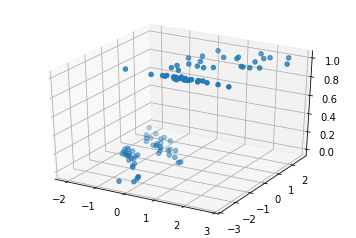

In [104]:
def plot3d(x,y,z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z)
    plt.show()

def plot_prediction3d(x1,y1,z1, x2,y2,z2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1,y1,z1, alpha=0.5)
    ax.scatter(x2,y2,z2)
    plt.show()

# Zufallsdaten darstellen
plot3d(X[:,0], X[:,1], y)

Da die Daten zufällig generiert worden sind, sehen sie bei jeder Ausführung anders aus. Um jedes Mal die gleichen Daten zu erzeugen kann man für die `make_classification` Funktion zusätzlich das Parameter `random_state=` auf eine Zahl setzen.

Jetzt können wir das lineare Modell anpassen und die Vorhersagen berechnen.

In [105]:
regr = LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Für die Genauigkeit dieses Modells kann man eine andere Metrik verwenden. Da es nur zwei Klassen im Datensatz gibt, ist die Vorhersage entweder richtig oder falsch. Zusätzlich werden die zwei Klassen mit 0 oder 1 bezeichnet. 

In Numpy kann man zwei Vektoren der gleichen Form so vergleichen: `a == b` Das Ergebnis ist ein Vektor mit derselben Dimension und `True` oder `False` als Werte, abhängig davon, ob an dieser Stelle die Vektoren `a` und `b` gleich sind. Zunächst können wir diesen neuen Vektor summieren und bekommen die Anzahl von korrekt klassifizierten Stichproben.

Klassifikationsgüte vor Anpassung: 0.000000: 


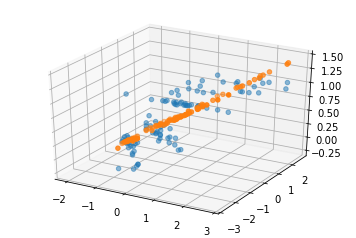

In [106]:
def classification_score(y, y_hat):
    correct = np.sum(y == y_hat)
    return correct/len(y)

print("Klassifikationsgüte vor Anpassung: %f: " % classification_score(y, regr.predict(X)))
plot_prediction3d(X[:,0], X[:,1], y, X[:,0], X[:,1], regr.predict(X))

Hier bekommt man allerdings eine Regression. Die Vorhersagen sind Fließkommazahlen und sind nicht durch 1 oder 0 begrenzt. Deswegen ist auch die Klassifikationsgüte 0. Wir müssen die Vorhersagen anpassen und nutzen dafür eine eigene Funktion:

Klassifikationsgüte nach Anpassung: 0.940000: 


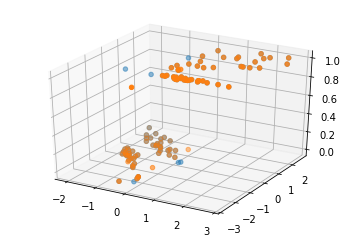

In [107]:
# Werte über 0,5 als 1 setzen, sonst 0
def fix_predictions(vector, threshold=0.5):
    for i in range(len(vector)):
        if vector[i] > 0.5:
            vector[i] = 1
        else:
            vector[i] = 0

    return vector

y_hat = fix_predictions(regr.predict(X))

print("Klassifikationsgüte nach Anpassung: %f: " % classification_score(y, y_hat))
plot_prediction3d(X[:,0], X[:,1], y, X[:,0], X[:,1], y_hat)